In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [20]:
# reading the data frame
df = pd.read_csv("Churn_Modelling_Modified.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [24]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9700.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.908763,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.462194,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Perfromign Normalization

In [25]:
new_df = pd.DataFrame(df, columns=['Age', 'Tenure'])

In [26]:
new_df.head()

,Age,Tenure
0,42.0,2
1,41.0,1
2,42.0,8
3,39.0,1
4,43.0,2


In [27]:
#checking nan values in new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     9700 non-null   float64
 1   Tenure  10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [28]:
#handling the nan values by inputing mean
new_df["Age"] = new_df["Age"].fillna(new_df["Age"].mean())

In [29]:
new_df.isna().sum()

Age       0
Tenure    0
dtype: int64

In [39]:
#creating objecy of the min max scaller
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(new_df)
print(normalized_df)

[[0.32432432 0.2       ]
 [0.31081081 0.1       ]
 [0.32432432 0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


### performing standardization

In [ ]:
scaler = StandardScaler()
standardised_df = scaler.fit_transform(new_df)
print(standardised_df)


[[ 0.30001715 -1.04175968]
 [ 0.20296308 -1.38753759]
 [ 0.30001715  1.03290776]
 ...
 [-0.28230729  0.68712986]
 [ 0.30001715 -0.69598177]
 [-1.05873987 -0.35020386]]


AttributeError: 'numpy.ndarray' object has no attribute 'head'

Text(0.5, 1.0, 'Historgram of orginal data and normalized data')

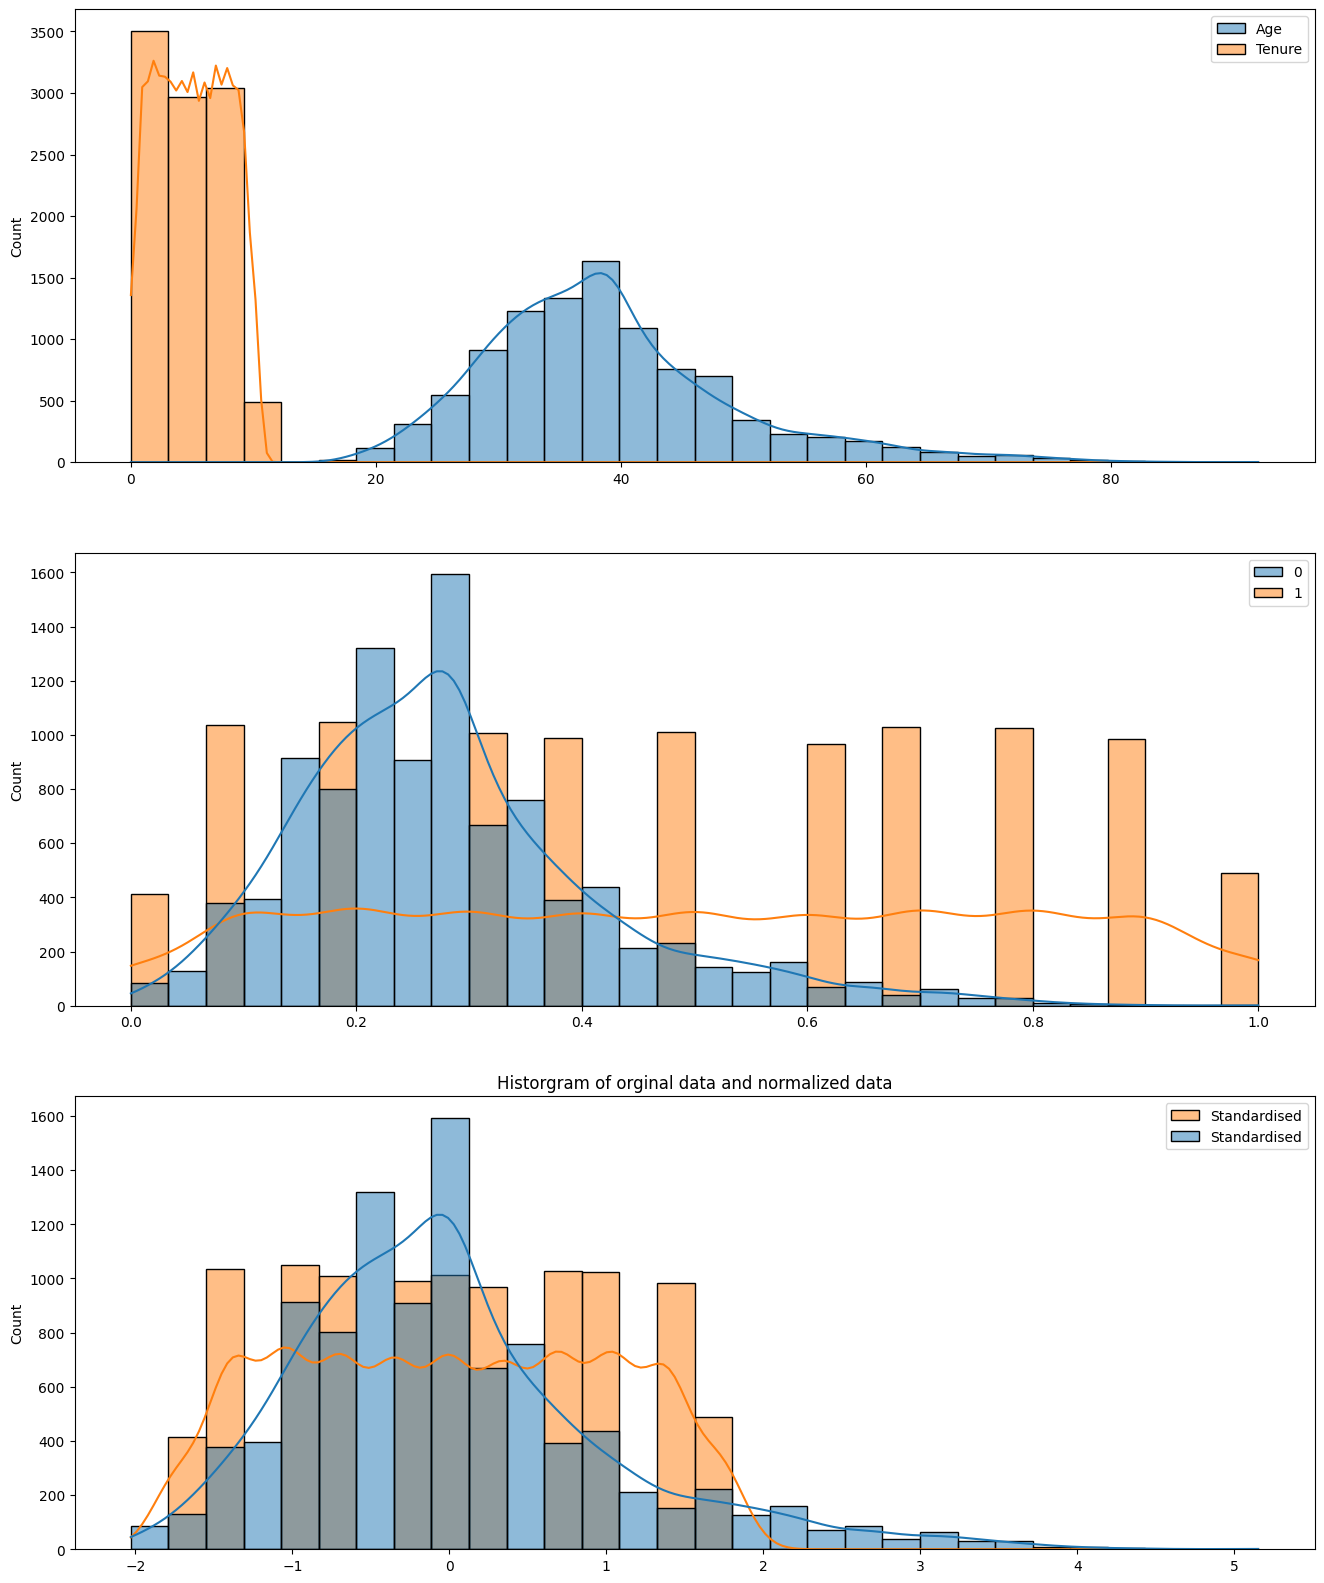

In [48]:
#visulasing the dataset
plt.figure(figsize=(16, 20))
plt.subplot(3, 1, 1)
sns.histplot(new_df, bins = 30, kde = True, color='blue', label = 'Origginal')
plt.subplot(3, 1, 2)
sns.histplot(normalized_df, bins = 30, kde = True, color='blue', label = 'Normalized')
plt.subplot(3, 1, 3)
sns.histplot(standardised_df, bins = 30, kde = True, color='blue', label = 'Standardised')
plt.legend()
plt.title("Historgram of orginal data and normalized data")

